In [2]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [185]:
import pandas as pd
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

import pymongo
from pymongo import MongoClient

# NIVEL 1

## EJERCICIO 1

### Creation of "pruebas" cluster through MongoDB Compass

In [118]:
image1 = mpimg.imread(r'C:\Users\tomi_\Documents\Cibernarium\Ejercicios_Python\S18\mongo-basedato-1.jpg')

In [119]:
plt.figure(figsize = (200,200))
plt.imshow(image1, interpolation='nearest')

### Connecting to Mongo Compass

In [18]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")

mydb = myclient["mydatabase"]

### Checking available databases

In [35]:
dblist = myclient.list_database_names()
dblist


['admin', 'config', 'local', 'pruebas1']

## EJERCICIO 2

### Inserting data to already created database (1 record had already been added through Mongo cmd)

##### Connecting to pruebas1

In [28]:
database = myclient.pruebas1

In [36]:
usuarios = database.usuarios

##### Addition of new line

In [39]:
row = {"_id": 12345, "nombre": "hola", "mail": "hola@hola.com"}

In [40]:
usuarios.insert_one(row)

In [120]:
image2 = mpimg.imread(r'C:\Users\tomi_\Documents\Cibernarium\Ejercicios_Python\S18\mongo-insert-2.jpg')

In [121]:
plt.figure(figsize = (200,200))
plt.imshow(image2, interpolation='nearest')

### Inserting several rows at the same time

In [51]:
row2 = {"_id": 12346, "nombre": "hola", "mail": "hola@hola.com"}
row3 = {"_id": 12347, "nombre": "hola", "mail": "hola@hola.com"}
row4 = {"_id": 12348, "nombre": "hola", "mail": "hola@hola.com"}

In [53]:
usuarios.insert_many([row2, row3, row4])

In [122]:
image3 = mpimg.imread(r'C:\Users\tomi_\Documents\Cibernarium\Ejercicios_Python\S18\mongo-insert_many-3.jpg')

In [123]:
plt.figure(figsize = (200,200))
plt.imshow(image3, interpolation='nearest')

# NIVEL 2

## EJERCICIO 1

### Queries to database

##### Connecting "world_cup_players" database 

In [54]:
database = myclient.pruebas1

In [55]:
players = database.world_cup_players

##### Total amount of records:

In [93]:
players.find().count()

C:\Users\tomi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


9443

##### Databasae info

In [94]:
players_info = database.get_collection("players")

In [95]:
players_info

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'pruebas1'), 'players')

##### Running query on elements with Team key = "Argentina"

In [65]:
results2 = players.find({"Team": "Argentina"})

In [66]:
for result in results2:
    print(result)

{'_id': ObjectId('60e83807a6973ea99497ffd6'), 'Competition': 'World Cup', 'Year': 1930, 'Team': 'Argentina', 'Number': '', 'Position': 'GK', 'FullName': 'Ãngel Bossio', 'Club': 'Club AtlÃ©tico Talleres de Remedios de Escalada', 'ClubCountry': 'Argentina', 'DateOfBirth': '1905-5-5', 'IsCaptain': False}
{'_id': ObjectId('60e83807a6973ea99497ffd7'), 'Competition': 'World Cup', 'Year': 1930, 'Team': 'Argentina', 'Number': '', 'Position': 'GK', 'FullName': 'Juan Botasso', 'Club': 'Quilmes AtlÃ©tico Club', 'ClubCountry': 'Argentina', 'DateOfBirth': '1908-10-23', 'IsCaptain': False}
{'_id': ObjectId('60e83807a6973ea99497ffd8'), 'Competition': 'World Cup', 'Year': 1930, 'Team': 'Argentina', 'Number': '', 'Position': 'FW', 'FullName': 'Roberto Cherro', 'Club': 'Boca Junio', 'ClubCountry': 'Argentina', 'DateOfBirth': '1907-2-23', 'IsCaptain': False}
{'_id': ObjectId('60e83807a6973ea99497ffd9'), 'Competition': 'World Cup', 'Year': 1930, 'Team': 'Argentina', 'Number': '', 'Position': 'DF', 'FullNa

##### Getting players having played WorldCup from year 2000+

In [72]:
results3 = players.find({"Year": {"$gt":2000}})

In [73]:
for result in results3:
    print(result)

{'_id': ObjectId('60e83807a6973ea99498046f'), 'Competition': 'World Cup', 'Year': 1954, 'Team': 'Brazil', 'Number': '1', 'Position': 'GK', 'FullName': '', 'Club': 'Fluminense Football Club', 'ClubCountry': 'Brazil', 'DateOfBirth': '1927-11-27', 'IsCaptain': False}
{'_id': ObjectId('60e83807a6973ea994980470'), 'Competition': 'World Cup', 'Year': 1954, 'Team': 'Brazil', 'Number': '2', 'Position': 'DF', 'FullName': 'Djalma Santos', 'Club': 'AssociaÃ§Ã£o Portuguesa de Desportos', 'ClubCountry': 'Brazil', 'DateOfBirth': '1929-2-27', 'IsCaptain': False}
{'_id': ObjectId('60e83807a6973ea994980471'), 'Competition': 'World Cup', 'Year': 1954, 'Team': 'Brazil', 'Number': '3', 'Position': 'DF', 'FullName': '', 'Club': 'Botafogo de Futebol e Regatas', 'ClubCountry': 'Brazil', 'DateOfBirth': '1927-5-16', 'IsCaptain': False}
{'_id': ObjectId('60e83807a6973ea994980472'), 'Competition': 'World Cup', 'Year': 1954, 'Team': 'Brazil', 'Number': '4', 'Position': 'DF', 'FullName': '', 'Club': 'AssociaÃ§Ã£o 

{'_id': ObjectId('60e83807a6973ea994980729'), 'Competition': 'World Cup', 'Year': 1958, 'Team': 'AUT', 'Number': '19', 'Position': 'FW', 'FullName': 'Robert Dienst', 'Club': 'SK Rapid Wi', 'ClubCountry': 'Austria', 'DateOfBirth': '1928-3-1', 'IsCaptain': False}
{'_id': ObjectId('60e83807a6973ea99498072a'), 'Competition': 'World Cup', 'Year': 1958, 'Team': 'AUT', 'Number': '20', 'Position': 'FW', 'FullName': 'Herbert Ninaus', 'Club': 'Grazer ', 'ClubCountry': 'Austria', 'DateOfBirth': '1937-3-31', 'IsCaptain': False}
{'_id': ObjectId('60e83807a6973ea99498072b'), 'Competition': 'World Cup', 'Year': 1958, 'Team': 'AUT', 'Number': '21', 'Position': 'MF', 'FullName': 'Ignaz Puschnik', 'Club': 'Kapfenberger ', 'ClubCountry': 'Austria', 'DateOfBirth': '1934-2-5', 'IsCaptain': False}
{'_id': ObjectId('60e83807a6973ea99498072c'), 'Competition': 'World Cup', 'Year': 1958, 'Team': 'AUT', 'Number': '22', 'Position': 'GK', 'FullName': 'Bruno Engelmeier', 'Club': '1. Simmeringer ', 'ClubCountry': 'A

{'_id': ObjectId('60e83808a6973ea9949811b8'), 'Competition': 'World Cup', 'Year': 1986, 'Team': 'Uruguay', 'Number': '20', 'Position': 'FW', 'FullName': 'Carlos Aguilera', 'Club': 'Club Nacional de Football', 'ClubCountry': 'Uruguay', 'DateOfBirth': '1964-9-21', 'IsCaptain': False}
{'_id': ObjectId('60e83808a6973ea9949811b9'), 'Competition': 'World Cup', 'Year': 1986, 'Team': 'Uruguay', 'Number': '21', 'Position': 'FW', 'FullName': 'Wilmar Cabrera', 'Club': 'Valencia CF', 'ClubCountry': 'Spain', 'DateOfBirth': '1959-7-31', 'IsCaptain': False}
{'_id': ObjectId('60e83808a6973ea9949811ba'), 'Competition': 'World Cup', 'Year': 1986, 'Team': 'Uruguay', 'Number': '22', 'Position': 'GK', 'FullName': 'Celso Otero', 'Club': 'Montevideo Wanderers F.C.', 'ClubCountry': 'Uruguay', 'DateOfBirth': '1958-2-1', 'IsCaptain': False}
{'_id': ObjectId('60e83808a6973ea9949811bb'), 'Competition': 'World Cup', 'Year': 1986, 'Team': 'FRG', 'Number': '1', 'Position': 'GK', 'FullName': 'Harald Schumacher', 'Clu

{'_id': ObjectId('60e83808a6973ea994981b94'), 'Competition': 'World Cup', 'Year': 2002, 'Team': 'Mexico', 'Number': '6', 'Position': 'MF', 'FullName': 'Gerardo Torrado', 'Club': 'Polideportivo Ejido', 'ClubCountry': 'Spain', 'DateOfBirth': '1979-4-30', 'IsCaptain': False}
{'_id': ObjectId('60e83808a6973ea994981b95'), 'Competition': 'World Cup', 'Year': 2002, 'Team': 'Mexico', 'Number': '7', 'Position': 'MF', 'FullName': '', 'Club': 'Chivas de Guadalajara', 'ClubCountry': 'Mexico', 'DateOfBirth': '1975-10-10', 'IsCaptain': False}
{'_id': ObjectId('60e83808a6973ea994981b96'), 'Competition': 'World Cup', 'Year': 2002, 'Team': 'Mexico', 'Number': '8', 'Position': 'MF', 'FullName': '', 'Club': 'Puebla F.C.', 'ClubCountry': 'Mexico', 'DateOfBirth': '1967-5-11', 'IsCaptain': False}
{'_id': ObjectId('60e83808a6973ea994981b97'), 'Competition': 'World Cup', 'Year': 2002, 'Team': 'Mexico', 'Number': '9', 'Position': 'FW', 'FullName': 'Jared Borgetti', 'Club': 'Santos Laguna', 'ClubCountry': 'Mexi

##### Players from Argentina or Italia. Displaying only FullName, Team, Club and Position

In [108]:
results4 = players.find({"Team": "Argentina"}, {"FullName": 1, "Team": 1, "Position": 1, "Club": 1, "_id":0})

In [109]:
for result in results4:
    print(result)

{'Team': 'Argentina', 'Position': 'GK', 'FullName': 'Ãngel Bossio', 'Club': 'Club AtlÃ©tico Talleres de Remedios de Escalada'}
{'Team': 'Argentina', 'Position': 'GK', 'FullName': 'Juan Botasso', 'Club': 'Quilmes AtlÃ©tico Club'}
{'Team': 'Argentina', 'Position': 'FW', 'FullName': 'Roberto Cherro', 'Club': 'Boca Junio'}
{'Team': 'Argentina', 'Position': 'DF', 'FullName': 'Alberto Chividini', 'Club': 'Central Norte TucumÃ'}
{'Team': 'Argentina', 'Position': 'FW', 'FullName': '', 'Club': 'Club Atletico Estudiantil PorteÃ±o'}
{'Team': 'Argentina', 'Position': 'DF', 'FullName': '', 'Club': 'Racing Club de Avellaneda'}
{'Team': 'Argentina', 'Position': 'DF', 'FullName': 'Juan Evaristo', 'Club': 'Sportivo Barrac'}
{'Team': 'Argentina', 'Position': 'FW', 'FullName': 'Mario Evaristo', 'Club': 'Boca Junio'}
{'Team': 'Argentina', 'Position': 'FW', 'FullName': 'Manuel Ferreira', 'Club': 'Estudiantes de La Pla'}
{'Team': 'Argentina', 'Position': 'MF', 'FullName': 'Luis Monti', 'Club': 'Club AtlÃ©ti

##### Players having played for Argentina, older than 30 and hacing played for Club AtlÃ©tico River Plate

In [158]:
results5 = players.find({"Team": "Argentina", "Club": "Club AtlÃ©tico River Plate"}, {"FullName": 1, "Team": 1, "Position": 1, "Club": 1, "_id":0})

In [159]:
for result in results5:
    print(result)

{'Team': 'Argentina', 'Position': 'FW', 'FullName': '', 'Club': 'Club AtlÃ©tico River Plate'}
{'Team': 'Argentina', 'Position': 'GK', 'FullName': 'Ubaldo Fillol', 'Club': 'Club AtlÃ©tico River Plate'}
{'Team': 'Argentina', 'Position': 'MF', 'FullName': '', 'Club': 'Club AtlÃ©tico River Plate'}
{'Team': 'Argentina', 'Position': 'FW', 'FullName': 'Mario Kempes', 'Club': 'Club AtlÃ©tico River Plate'}
{'Team': 'Argentina', 'Position': 'DF', 'FullName': 'Julio Olarticoechea', 'Club': 'Club AtlÃ©tico River Plate'}
{'Team': 'Argentina', 'Position': 'DF', 'FullName': 'Daniel Passarella captain (association football)', 'Club': 'Club AtlÃ©tico River Plate'}
{'Team': 'Argentina', 'Position': 'DF', 'FullName': 'Alberto Tarantini', 'Club': 'Club AtlÃ©tico River Plate'}
{'Team': 'Argentina', 'Position': 'MF', 'FullName': 'Sergio Batista', 'Club': 'Club AtlÃ©tico River Plate'}
{'Team': 'Argentina', 'Position': 'DF', 'FullName': '', 'Club': 'Club AtlÃ©tico River Plate'}
{'Team': 'Argentina', 'Position

# NIVEL 3

## EJERCICIO 1

### Transforming whole dataset to pandas DF.

In [125]:
players_dataset = players.find()

In [126]:
df =  pd.DataFrame(list(players_dataset))

In [128]:
df.drop(columns=["_id"], inplace=True, axis=1)

In [129]:
df

Competition  Year         Team Number Position           FullName  \
0      World Cup  1930    Argentina              GK       Ãngel Bossio   
1      World Cup  1930    Argentina              GK       Juan Botasso   
2      World Cup  1930    Argentina              FW     Roberto Cherro   
3      World Cup  1930    Argentina              DF  Alberto Chividini   
4      World Cup  1930    Argentina     10       FW                      
...          ...   ...          ...    ...      ...                ...   
9438   World Cup  2014  South Korea     19       FW        Ji Dong-won   
9439   World Cup  2014  South Korea     20       DF      Hong Jeong-ho   
9440   World Cup  2014  South Korea     21       GK      Kim Seung-gyu   
9441   World Cup  2014  South Korea     22       DF                      
9442   World Cup  2014  South Korea     23       GK      Lee Bum-young   

                                                 Club ClubCountry DateOfBirth  \
0     Club AtlÃ©tico Talleres de Remedios de Escalada   Argentina    1905-5-5   
1                              Quilmes AtlÃ©tico Club   Argentina  1908-10-23   
2                                          Boca Junio   Argentina   1907-2-23   
3                                Central Norte TucumÃ   Argentina   1907-2-23   
4                  Club Atletico Estudiantil PorteÃ±o   Argentina   1909-3-19   
...                                               ...         ...         ...   
9438                                        FC Augsbu         GER   1991-5-28   
9439                                        FC Augsbu         GER   1989-8-12   
9440                                 Ulsan Hyundai FC         KOR   1990-9-30   
9441                                  1. FSV Mainz 05         GER   1987-1-16   
9442                                       Busan I'Pa         KOR    1989-4-2   

      IsCaptain  
0         False  
1         False  
2         False  
3         False  
4         False  
...         ...  
9438      False  
9439      False  
9440      False  
9441      False  
9442      False  

[9443 rows x 10 columns]

## Statistical description on main Attributes

- Most World Cups played by country
- Club with highest amount of players
- Amount of captains by position
- Amount of captains by position and country
- Captains by top 10 countries and by position


### Countries with most WorldCups played

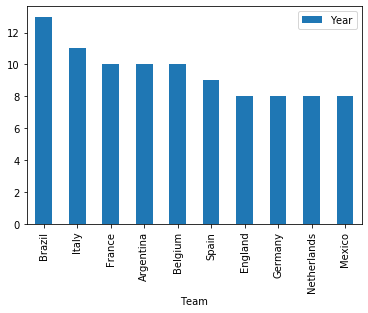

In [168]:
grouped_team_year = df.groupby(['Team','Year']).size().reset_index(name='counts')
top10_grouped_team_year = grouped_team_year.groupby('Team')[['Year']].count().sort_values(by='Year', ascending=False).head(10)
top10_grouped_team_year.plot(kind='bar')

In [169]:
top10_grouped_team_year

Year
Team             
Brazil         13
Italy          11
France         10
Argentina      10
Belgium        10
Spain           9
England         8
Germany         8
Netherlands     8
Mexico          8

##### Top 10 countries names

In [199]:
top10_countries_names = list(top10_grouped_team_year.index)
top10_countries_names

['Brazil',
 'Italy',
 'France',
 'Argentina',
 'Belgium',
 'Spain',
 'England',
 'Germany',
 'Netherlands',
 'Mexico']

### Club with highest amount of players

In [237]:
groupped_clubs = df.groupby('Club')[['Team']].count().reset_index()
top10_groupped_clubs = groupped_clubs.sort_values(by='Team', ascending=False).head(10)
top10_groupped_clubs

Club  Team
950                Juventus F.C.   114
624                 FC Barcelona    99
20                    A.C. Milan    96
627             FC Bayern Munich    91
604   F.C. Internazionale Milano    90
1085      Manchester United F.C.    86
1326            Real Madrid C.F.    74
1049              Liverpool F.C.    70
175                 Arsenal F.C.    67
293                C.A. PeÃ±arol    66

### Amount of captains by position

In [181]:
grouped_position_year = df.groupby(['Position','Year'])[['IsCaptain']].sum().reset_index()
top10_grouped_position_year = grouped_position_year.groupby('Position')[['IsCaptain']].sum().sort_values(by='IsCaptain', ascending=False).head(10)
top10_grouped_position_year

IsCaptain
Position           
DF            139.0
MF            107.0
FW             66.0
GK             41.0
                0.0

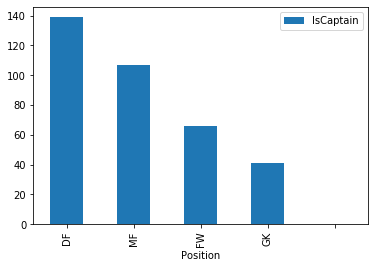

In [182]:
top10_grouped_position_year.plot(kind='bar')

### Amount of Captains by Position and by Year

In [204]:
grouped_position_year

Position  Year  IsCaptain
0            1986        0.0
1        DF  1930        1.0
2        DF  1934        0.0
3        DF  1938        0.0
4        DF  1950        0.0
..      ...   ...        ...
76       MF  1998       11.0
77       MF  2002        9.0
78       MF  2006       10.0
79       MF  2010        8.0
80       MF  2014        8.0

[81 rows x 3 columns]

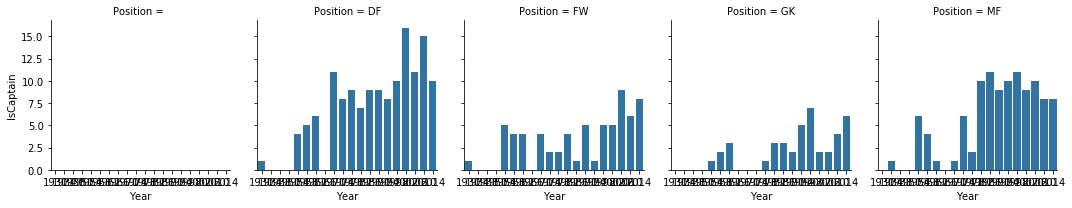

In [212]:
grouped_position_year_graph = sns.FacetGrid(data=grouped_position_year, col='Position')
grouped_position_year_graph.map(sns.barplot, 'Year', 'IsCaptain');

### Captains by top 10 countries and by position for TOP 10 countries

In [209]:
grouped_team_position = df.groupby(['Position', 'Team'])[['IsCaptain']].sum().reset_index()
grouped_team_position_top10_countries = grouped_team_position[grouped_team_position['Team'].isin(top10_countries_names)]

In [213]:
grouped_team_position_top10_countries

Position         Team  IsCaptain
7         DF    Argentina        2.0
13        DF      Belgium        3.0
17        DF       Brazil        5.0
41        DF      England        2.0
46        DF       France        2.0
48        DF      Germany        2.0
60        DF        Italy        6.0
71        DF       Mexico        4.0
76        DF  Netherlands        3.0
110       DF        Spain        1.0
141       FW    Argentina        2.0
147       FW      Belgium        3.0
151       FW       Brazil        0.0
175       FW      England        1.0
180       FW       France        0.0
182       FW      Germany        1.0
194       FW        Italy        1.0
205       FW       Mexico        1.0
210       FW  Netherlands        1.0
244       FW        Spain        2.0
275       GK    Argentina        0.0
281       GK      Belgium        0.0
285       GK       Brazil        0.0
309       GK      England        0.0
314       GK       France        1.0
316       GK      Germany        1.0
328       GK        Italy        2.0
339       GK       Mexico        0.0
344       GK  Netherlands        1.0
378       GK        Spain        5.0
409       MF    Argentina        5.0
415       MF      Belgium        1.0
419       MF       Brazil        4.0
443       MF      England        5.0
448       MF       France        4.0
450       MF      Germany        2.0
462       MF        Italy        0.0
473       MF       Mexico        2.0
478       MF  Netherlands        1.0
512       MF        Spain        0.0

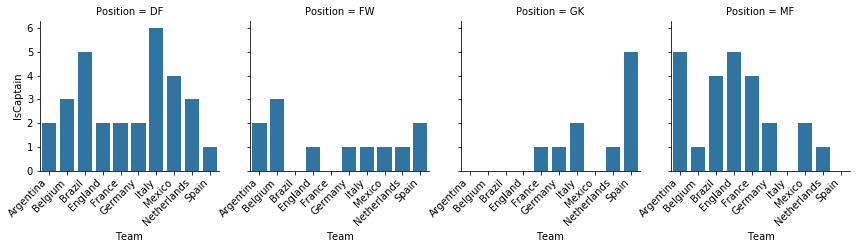

In [218]:
grouped_team_position_top10_countries_graph = sns.FacetGrid(data=grouped_team_position_top10_countries, col='Position')
grouped_team_position_top10_countries_graph.map(sns.barplot, 'Team', 'IsCaptain')
grouped_team_position_top10_countries_graph.set_xticklabels(rotation=45, ha='right')